In [38]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [39]:
# Load the LightGBM model
with open('LGBMRIFTH2.pkl', 'rb') as file:
    model = pickle.load(file)

In [40]:
# Load Training data from an Excel file
dataTr = pd.read_excel('TrainingDataIFTH2.xlsx')  # Replace 'data.xlsx' with your file path
dataTr

,P (MPa),T (K),"Salinity, Molality (mol/kg)","avg. critical temperature (Tcm, K)",IFT (mN/m)
0,27.617500,373.15,3.150,33.20,60.74020
1,6.890000,295.15,0.340,159.12,63.62000
2,1.034214,298.00,0.085,33.20,61.92154
3,1.000000,322.90,0.000,33.20,69.30000
4,2.723400,423.15,0.000,33.20,48.33510
...,...,...,...,...,...
196,3.450000,353.15,0.000,168.70,44.00000
197,20.680000,353.15,3.150,168.70,40.01000
198,8.270000,323.15,1.050,168.70,49.93000
199,20.680000,353.15,1.050,168.70,35.28000


In [41]:
# Load Test data from an Excel file
dataTs = pd.read_excel('TestDataIFTH2.xlsx')  # Replace 'data.xlsx' with your file path
dataTs

,P (MPa),T (K),"Salinity, Molality (mol/kg)","avg. critical temperature (Tcm, K)",IFT (mN/m)
0,13.789510,298.00,0.085,33.20,67.28081
1,27.367600,323.15,1.050,33.20,67.56300
2,39.900000,298.09,0.000,33.20,69.10000
3,3.450000,353.15,3.150,168.70,54.23000
4,3.450000,353.15,1.050,168.70,51.47000
5,2.674180,323.15,4.950,33.20,75.17960
6,6.890000,333.15,0.340,33.20,65.94000
7,8.270000,353.15,0.000,222.90,33.73000
8,1.723689,298.00,0.034,33.20,64.62538
9,8.270000,353.15,1.050,168.70,44.78000


In [42]:
# Split the data into features and target variable
XTr = dataTr.drop('IFT (mN/m)', axis=1)
y_train = dataTr['IFT (mN/m)']
XTs = dataTs.drop('IFT (mN/m)', axis=1)
y_test = dataTs['IFT (mN/m)']

In [43]:
# Make predictions Training data
pred_train = model.predict(XTr)
# Make predictions Test data
pred_test = model.predict(XTs)

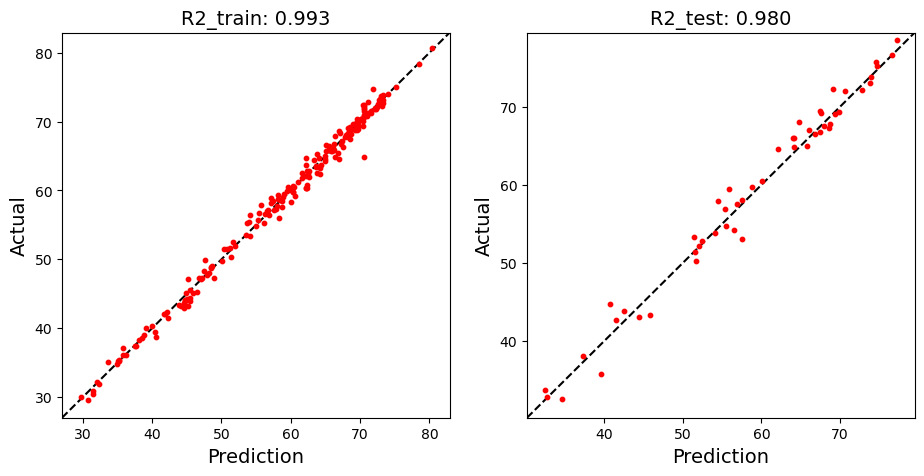

In [44]:
# Display the cross plots of training and test
train_labels = y_train
test_labels = y_test
plt.figure(figsize=(11, 5))

plt.subplot(121)
plt.scatter(pred_train, y_train, c='r', s=10)
x1, x2 = plt.xlim()
y1, y2 = plt.ylim()
lim = min(x1, y1), min(x2, y2)
plt.xlim(*lim)
plt.ylim(*lim)
plt.plot(lim, lim, 'k--', zorder=-1)
plt.xlabel("Prediction", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title(f"R2_train: {r2_score(train_labels, pred_train):.3f}", fontsize=14)

plt.subplot(122)
plt.scatter(pred_test, y_test, c='r', s=10)
x1, x2 = plt.xlim()
y1, y2 = plt.ylim()
lim = min(x1, y1), min(x2, y2)
plt.xlim(*lim)
plt.ylim(*lim)
plt.plot(lim, lim, 'k--', zorder=-1)
plt.xlabel("Prediction", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title(f"R2_test: {r2_score(test_labels, pred_test):.3f}", fontsize=14);
plt.show()

In [45]:
# Load Other data to check the model from an Excel file: This is just an example how to apply the model for other data with unknown IFT value
dataOther = pd.read_excel('OtherDataIFTH2.xlsx')  # Replace 'data.xlsx' with your file path
dataOther

,P (MPa),T (K),"Salinity, Molality (mol/kg)","avg. critical temperature (Tcm, K)"
0,13.79,353.15,3.15,222.9


In [46]:
# Split the data into features
features = ['P (MPa)','T (K)','Salinity, Molality (mol/kg)','avg. critical temperature (Tcm, K)']
X = dataOther[features]

In [49]:
# Make predictions Training data
predIFT = model.predict(X)
print(predIFT)

[35.15358035]
